# Rendering Train Data
Converting image pairs to the hdf5 format

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
import os
import glob
import pandas as pd
from IPython.core.display import HTML
from IPython.display import Image, display

In [3]:
hpath = '/content/drive/My Drive/Procedural Map Generation/Height/*.jpeg'
tpath = '/content/drive/My Drive/Procedural Map Generation/Texture/*.jpeg'

In [4]:
height_maps = []
for imageName in glob.glob(hpath):
    height_maps.append(imageName)
height_maps.sort(key=lambda x: int(re.findall(r'[0-9]+', x)[0]))
img_hmap = [Image(filename=x) for x in height_maps]

In [5]:
texture_maps = []
for imageName in glob.glob(tpath):
    texture_maps.append(imageName)
texture_maps.sort(key=lambda y: int(re.findall(r'[0-9]+', y)[0]))
img_tmap = [Image(filename=y) for y in texture_maps]

In [11]:
df = pd.DataFrame(list(zip(height_maps, img_hmap, texture_maps, img_tmap)), columns = ['HName', 'Heightmap', 'TName', 'Texturemap'])
df.head()

,HName,Heightmap,TName,Texturemap
0,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>
1,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>
2,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>
3,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>
4,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>,/content/drive/My Drive/Procedural Map Generat...,<IPython.core.display.Image object>


/content/drive/My Drive/Procedural Map Generation/Height/0.jpeg



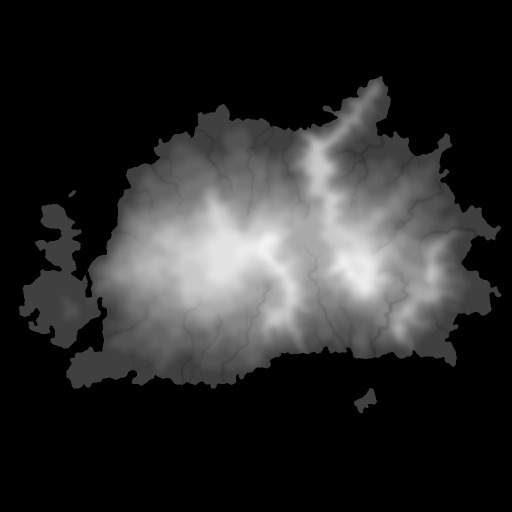

In [14]:
print(df['HName'][0])
print()
display(df['Heightmap'][0])

/content/drive/My Drive/Procedural Map Generation/Texture/_0.jpeg



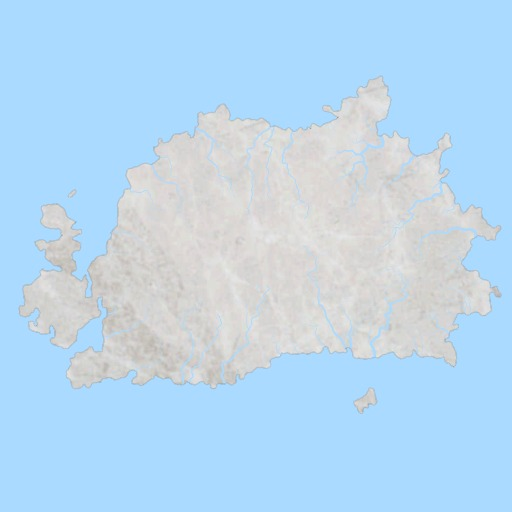

In [15]:
print(df['TName'][0])
print()
display(df['Texturemap'][0])

In [16]:
df.to_hdf('/content/drive/My Drive/Procedural Map Generation/data.h5', key='df', mode='w')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['HName', 'Heightmap', 'TName', 'Texturemap'], dtype='object')]

  encoding=encoding,
